In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from score_model import *
from gameover_model import *
import cv2
import pickle

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
import gc

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import tensorflow as tf
from tqdm import tqdm

In [7]:
score_model = generate_scoring_model()
time_model = generate_time_model()
position_score_model = generate_position_model()

In [8]:
import pickle

def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)

def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [9]:
def process_img(image, sigma=0.4):
	# compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [10]:
def model_capture_return_images(images): 
    
    # predict command
    imgs = np.array(images).astype(np.uint8)
    #imgs = np.expand_dims(imgs, axis=0)
    imgs = np.swapaxes(imgs,0,1)
    imgs = np.swapaxes(imgs,1,2)
    #print('model_capture_return_images shape',imgs.shape)
    return imgs

def prepare_db(queue,epoch=1):
    
    #score_model = generate_scoring_model()
    #position_score_model = generate_position_model()
    
    #Applying Q-Learning
    # learning rate - in reinforcement learning, this is gamma
    LR = 0.5 * (1 - ((epoch-1)/1000))
    
    if LR < 0.1:
        LR = 0.1
    
    actions = []
    frame_imgs = []
    score = []
    score_points = []
    score_position = []
    time = []
    
    #print('Starting to organize data before training... Nº', 0, 'of', len(queue),'samples.', end='\r')
    for i in tqdm(np.arange(5,len(queue)-5,1)):
        if queue[i][1][:4] != [1,0,0,0]:
            #print('Starting to organize data before training... Nº', i, 'of', len(queue),'samples.', end='\r')
            #frame_imgs.append(model_capture_return_images([j[0][100:,:] for j in queue[i-5:i]]))
            frame_imgs.append(model_capture_return_images( [ process_img(j[0][120:,60:270]) for j in queue[i-4:i+1]]))
            # ['a', 'b', 'r', 'l', 'g'][:4]
            actions.append(queue[i][1][:4])
            # appending score
            #score_i = return_score(queue[i][0],score_model)
            #score_f = return_score(queue[i+1][0],score_model)
            #position = return_position_score(queue[i+1][0],position_score_model)
            #score_points.append(np.clip(score_f-score_i,0,10000))
            #score_position.append(position[0])

            time.append(queue[i+5][2]-queue[i][2])
            # Q - Learning Happening Here
            #score.append(np.clip((score_points[-1]/10000) if score_points[-1] > 100 else -0.5, -0.5, 1)+np.clip(1 if score_position[0] > 0.6 else 0,0,1))
            
            
            
        elif np.random.rand() > 0.1:
            #print('Starting to organize data before training... Nº', i, 'of', len(queue),'samples.', end='\r')
            #frame_imgs.append(model_capture_return_images([j[0][100:,:] for j in queue[i-5:i]]))
            frame_imgs.append(model_capture_return_images( [ process_img(j[0][120:,60:270]) for j in queue[i-5:i]]))
            # ['a', 'b', 'r', 'l', 'g'][:4]
            actions.append(queue[i][1][:4])
            # appending score
            #score_i = return_score(queue[i][0],score_model)
            #score_f = return_score(queue[i+5][0],score_model)
            #position = return_position_score(queue[i+5][0],position_score_model)
            #score_points.append(np.clip(score_f-score_i,0,10000))
            #score_position.append(position[0])

            time.append(queue[i+5][2]-queue[i][2])
            # Q - Learning Happening Here
            #score.append(np.clip((score_points[-1]/10000) if score_points[-1] > 100 else -0.5, -0.5, 1)+np.clip(1 if score_position[0] > 0.6 else 0,0,1))
        
    """
    print('\n')
    print('Learning Rate: '+str(LR)+'.\n')
    print('Sample has ' + str(len(queue)) + ' training samples.\n')
    print('Mean time between samples: '+ str(np.mean(time)) + ' sec.\n')
    print('Mean Score between samples: ' + str(np.mean(score)) + ' points.\n')
    print('Mean Score Points between samples: ' + str(np.mean(score_points)) + ' points.\n')
    print('Mean Score Position between samples: ' + str(np.mean(score_position)) + ' points.\n')
    print('Maximum Train Score: ' + str(return_score(queue[-1][0],score_model))+'.\n')
    print('Maximum Delta Score: ' + str(max(score)) + '.\nMinimum Delta Score:' + str(min(score))+'.\n')
    print('\n')
    """
    
    # pre trained model
    frame_imgs = np.array(frame_imgs)
    actions = np.array(actions)
    
    return frame_imgs, actions, score, score_points, score_position

In [11]:
files = ['fila_treino_segundo_132_0_.pkl','fila_treino_segundo_601_0_.pkl',
         'fila_treino_segundo_601_1_.pkl','fila_treino_segundo_601_2_.pkl',
         'fila_treino_segundo_601_3_.pkl','fila_treino_segundo_601_4_.pkl',
         'fila_treino_segundo_601_5_.pkl','fila_treino_segundo_601_6_.pkl',
         'fila_treino_segundo_74_0_.pkl']

In [12]:
queue = []
for file in files:
    print(file)
    q = load_file('./ANALYSE_DATA/'+file)
    queue = queue + q


fila_treino_segundo_132_0_.pkl
fila_treino_segundo_601_0_.pkl
fila_treino_segundo_601_1_.pkl
fila_treino_segundo_601_2_.pkl
fila_treino_segundo_601_3_.pkl
fila_treino_segundo_601_4_.pkl
fila_treino_segundo_601_5_.pkl
fila_treino_segundo_601_6_.pkl
fila_treino_segundo_74_0_.pkl


In [13]:
del q
gc.collect()

22

In [14]:
frame_imgs, actions, score, score_points, score_position = prepare_db(queue)

100%|███████████████████████████████████████████████████████████████████████████| 32139/32139 [01:21<00:00, 394.25it/s]


In [15]:
frame_imgs.shape

(30591, 100, 210, 5)

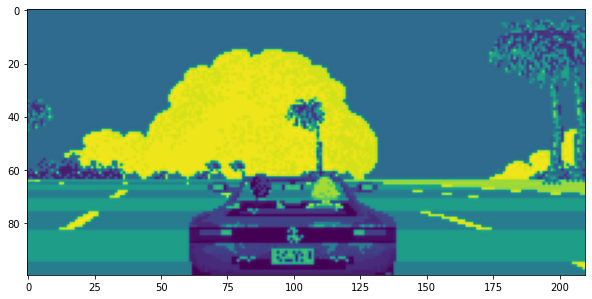

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(queue[2000][0][120:,60:270])

In [17]:
queue[2000][1]

[1, 0, 0, 1, 0]

In [18]:
del queue
gc.collect()

44

#### Creating DataFrame

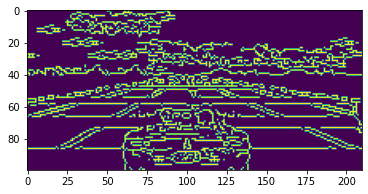

In [19]:
plt.imshow(frame_imgs[350,:,:,0])

Arrumando Comandos


In [20]:
com = [(1000*1 if i[0] == 1 and i[1] == 0 else 0) +  100*i[1]    +10*i[2]  +1*i[3]  for i in actions]

In [21]:
com = pd.get_dummies(com)

In [22]:
com.describe()

0             1             10            100           101   \
count  30591.000000  30591.000000  30591.000000  30591.000000  30591.000000   
mean       0.028930      0.030695      0.023406      0.001438      0.013893   
std        0.167613      0.172494      0.151190      0.037899      0.117049   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               110           1000          1001          1010  
count  30591.000000  30591.000000  30591.000000  30591.000000  
mean       0.014579      0.475859      0.212840      0.198359  
std        0.119864      0.499425      0.409322      0.398770  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      1.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

In [23]:
com.columns

Int64Index([0, 1, 10, 100, 101, 110, 1000, 1001, 1010], dtype='int64')

In [24]:
com.shape, len(frame_imgs)

((30591, 9), 30591)

aqui:

In [25]:
#input_shape = (img_rows, img_cols, 1)
input_shape = (frame_imgs.shape[1], frame_imgs.shape[2], 5)
num_classes = com.shape[1]
batch_size = 256
epochs = 100 #600
input_shape,num_classes

((100, 210, 5), 9)

In [26]:
# CRIANDO MODELO
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x/255-0.5,input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(20, 20), strides=(1, 1)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=tf.keras.regularizers.l2(1e-4),activity_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=tf.keras.regularizers.l2(1e-4),activity_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=tf.keras.regularizers.l2(1e-4),activity_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(num_classes,activation='linear',name='output'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 100, 210, 5)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 81, 191, 32)       64032     
_________________________________________________________________
activation (Activation)      (None, 81, 191, 32)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 95, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 95, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 46, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 18, 46, 64)       

In [28]:
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(range(0,com.shape[0]),range(0,com.shape[0]), test_size=0.05, random_state=42)

In [29]:
#model.compile(loss=keras.losses.binary_crossentropy,
#              optimizer=keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / epochs),
#              metrics=['accuracy'])
INIT_LR = 1e-2
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse','mae'])

In [30]:
gc.collect()

31

In [31]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('D:\Reinforced_Outrun\Action_Encoded_Model\modelo_outrun_encoded_learning_best_mse.hdf5', save_best_only=True, monitor='val_loss', mode='auto')
#reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, min_delta=1e-4, mode='auto')

model.fit(
    frame_imgs[X_train,:,:,:], com.values[X_train],
    batch_size=batch_size,
    epochs=epochs,
    shuffle = True,
    validation_data=(frame_imgs[X_test,:,:,:], com.values[X_test]),
    #callbacks=[mcp_save, earlyStopping]
         )

Train on 29061 samples, validate on 1530 samples
Epoch 1/100
29061/29061 [==============================] - ETA: 41:44 - loss: 2.7495 - mse: 1.9223 - mae: 1.07 - ETA: 21:18 - loss: 2.6884 - mse: 1.8612 - mae: 1.05 - ETA: 14:28 - loss: 2.6615 - mse: 1.8342 - mae: 1.04 - ETA: 11:02 - loss: 2.6445 - mse: 1.8171 - mae: 1.04 - ETA: 8:59 - loss: 2.6352 - mse: 1.8077 - mae: 1.0421 - ETA: 7:37 - loss: 2.6203 - mse: 1.7926 - mae: 1.039 - ETA: 6:38 - loss: 2.5950 - mse: 1.7672 - mae: 1.032 - ETA: 5:53 - loss: 2.5739 - mse: 1.7460 - mae: 1.028 - ETA: 5:18 - loss: 2.5530 - mse: 1.7250 - mae: 1.022 - ETA: 4:50 - loss: 2.5490 - mse: 1.7208 - mae: 1.021 - ETA: 4:27 - loss: 2.5376 - mse: 1.7093 - mae: 1.019 - ETA: 4:08 - loss: 2.5333 - mse: 1.7048 - mae: 1.017 - ETA: 3:52 - loss: 2.5271 - mse: 1.6985 - mae: 1.015 - ETA: 3:38 - loss: 2.5195 - mse: 1.6908 - mae: 1.013 - ETA: 3:25 - loss: 2.5035 - mse: 1.6747 - mae: 1.009 - ETA: 3:14 - loss: 2.4979 - mse: 1.6690 - mae: 1.008 - ETA: 3:05 - loss: 2.4898 - 

In [32]:
model_json = model.to_json()
with open("D:\Reinforced_Outrun\Action_Encoded_Model\modelo_outrun_ae.json", "w") as json_file:
    json_file.write(model_json)

In [33]:
model.save_weights("D:\Reinforced_Outrun\Action_Encoded_Model\modelo_outrun_ae.hdf5")

In [34]:
model.save("D:\Reinforced_Outrun\Action_Encoded_Model\modelo_outrun_ae")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:\Reinforced_Outrun\Action_Encoded_Model\modelo_outrun_ae\assets


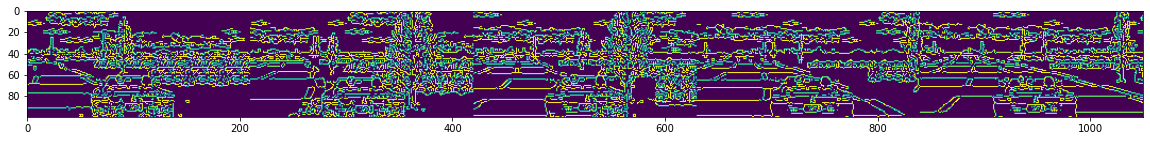

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 386, dtype: uint8
[ 5.79  2.26  7.69 -0.16 -0.84  2.81 35.06 12.53 23.6 ]
Soma 0.8873027


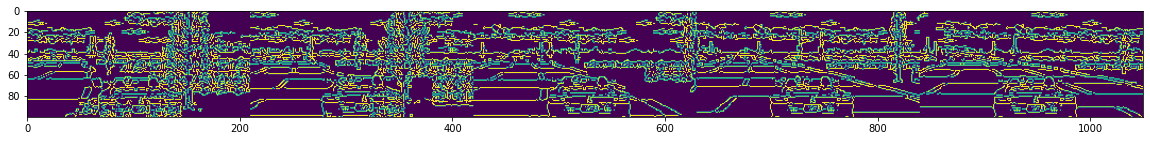

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 387, dtype: uint8
[ 5.7   4.78  9.61  1.63 -0.73  0.58 34.01 19.31 20.94]
Soma 0.9584539


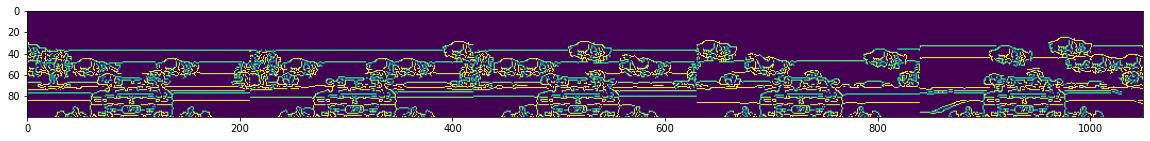

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    1
Name: 3162, dtype: uint8
[-0.22  0.54  8.26  0.17  4.36  9.19 14.54 -9.37 77.52]
Soma 1.0499762


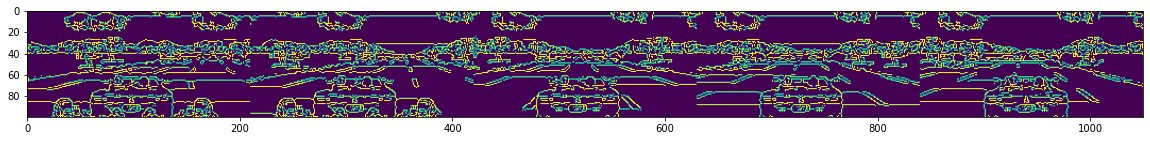

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 3182, dtype: uint8
[ 3.08e+00  1.08e+00  4.90e-01  3.30e-01  1.20e-01 -6.00e-02  8.02e+01
  6.23e+00  7.91e+00]
Soma 0.9936991


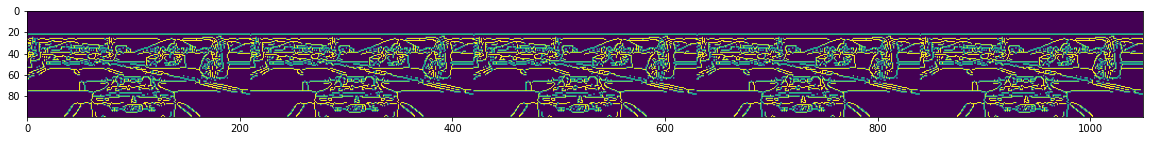

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 4130, dtype: uint8
[ 3.13  2.85  2.98 -2.5  -1.72  1.64 81.42  6.01  2.57]
Soma 0.9638839


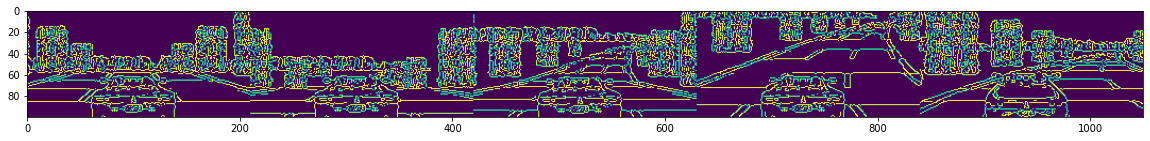

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    1
Name: 5816, dtype: uint8
[ 3.47  0.26 11.05 -1.59 -1.09  6.84 42.27  0.66 38.39]
Soma 1.002601


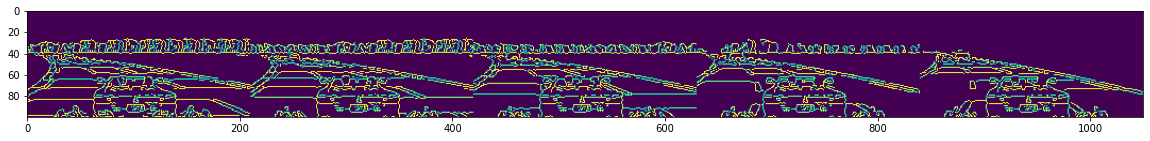

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 5852, dtype: uint8
[ 2.13  7.7  -3.73  0.72 -1.1  -2.02  7.57 92.61 -4.17]
Soma 0.99706876


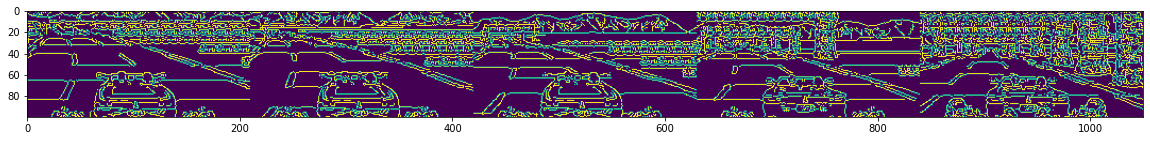

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 8156, dtype: uint8
[ 3.81 10.44 -0.12  2.18  8.95  2.98 33.98 37.88  5.12]
Soma 1.052296


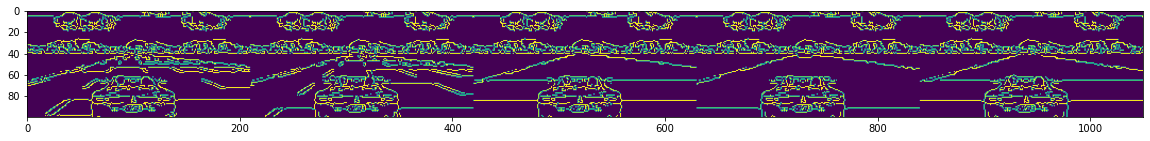

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 8599, dtype: uint8
[-2.900e+00  1.090e+00  2.040e+00 -1.000e-02 -1.700e+00 -9.500e-01
  9.863e+01 -1.330e+00  2.150e+00]
Soma 0.97012913


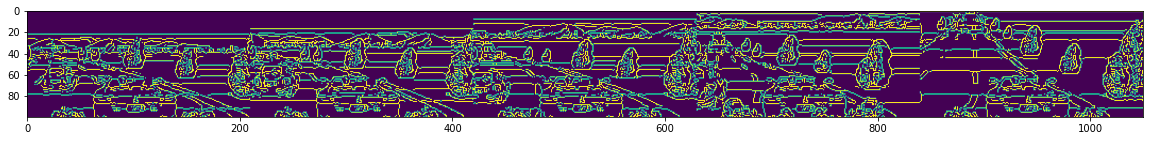

0       0
1       1
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    0
Name: 9895, dtype: uint8
[ 1.93 12.67 -0.5   4.19  7.54 -2.57 23.17 48.13  5.56]
Soma 1.0010266


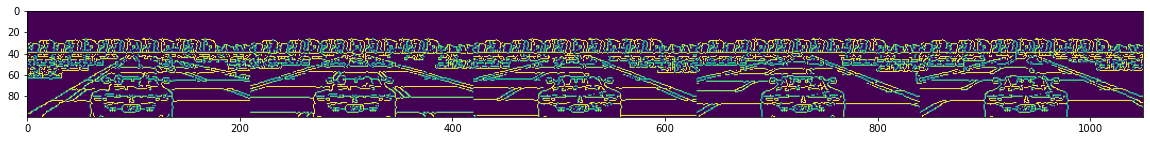

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 12683, dtype: uint8
[ 0.66  0.88 -0.43 -0.42 -0.63 -0.66 90.42 -1.09  9.45]
Soma 0.9818064


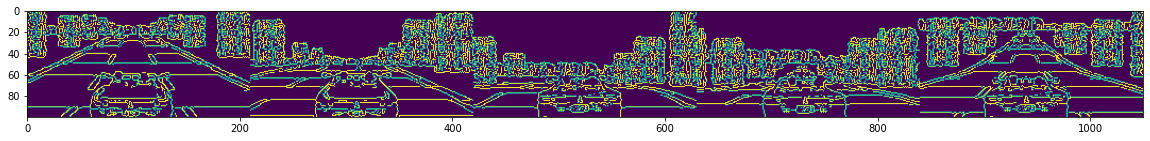

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 12934, dtype: uint8
[ 3.74  1.67  1.28 -1.72  1.15  1.74 96.42 -7.4  -0.73]
Soma 0.9614409


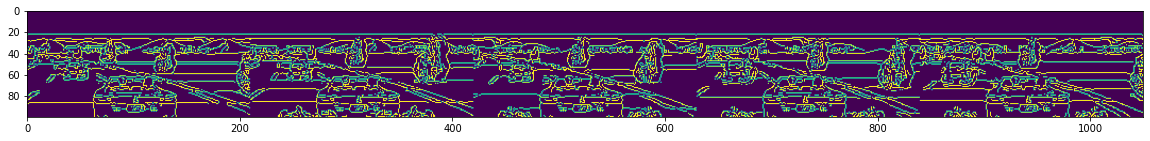

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 13577, dtype: uint8
[ 3.730e+00  1.117e+01  2.230e+00  1.360e+00  7.000e-02 -2.570e+00
  5.290e+00  8.651e+01 -4.950e+00]
Soma 1.0283046


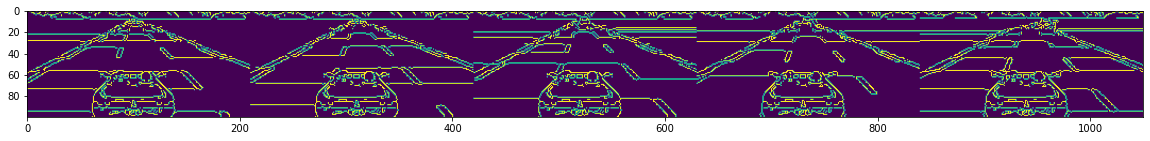

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 16810, dtype: uint8
[ -1.73  -1.39   0.92   0.8   -1.76  -1.33 100.99  -1.41   7.13]
Soma 1.0222137


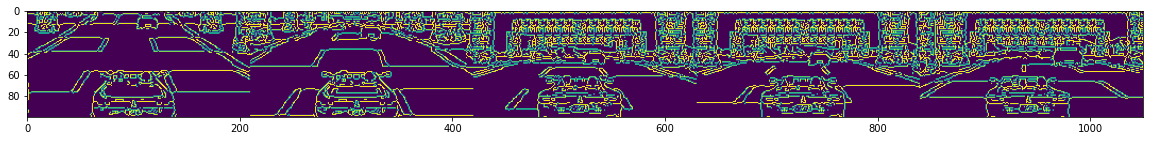

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 16839, dtype: uint8
[ 2.040e+00 -7.700e-01  2.000e+00 -1.000e-02  4.000e-01  1.670e+00
  8.532e+01  2.960e+00  6.070e+00]
Soma 0.99680346


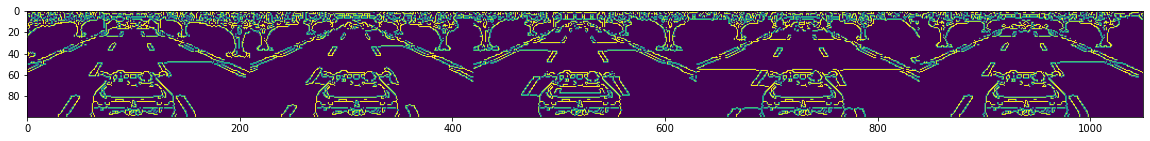

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 18012, dtype: uint8
[ -2.76  -2.1    2.67  -1.52  -1.79   0.8  109.37  -4.59   0.61]
Soma 1.0068916


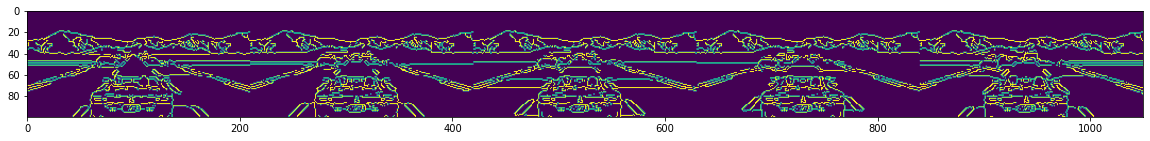

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 18683, dtype: uint8
[-0.72  0.76 -0.2   0.23 -0.57 -0.8  98.66 -0.94  1.45]
Soma 0.97868407


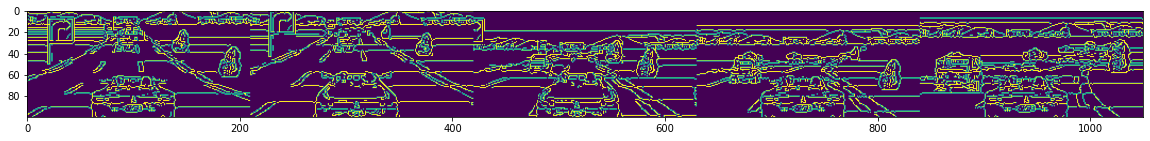

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    1
Name: 21277, dtype: uint8
[ 2.77 -0.35  6.42 -0.25  0.21  4.62 40.97  4.75 36.95]
Soma 0.9608711


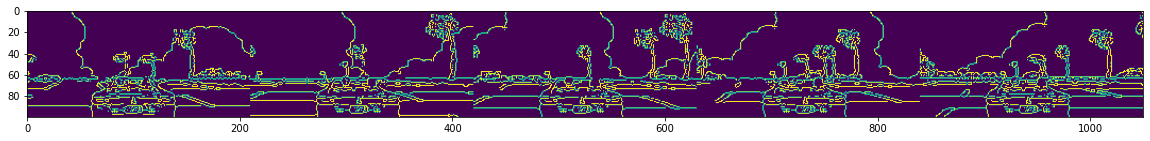

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 21506, dtype: uint8
[ 5.51  5.61  1.18  0.77 -0.    0.35 36.23 51.19 -3.16]
Soma 0.976919


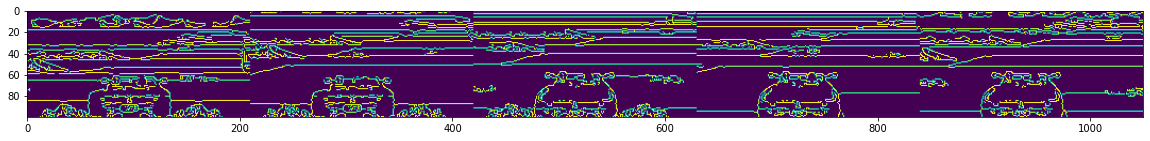

0       0
1       0
10      1
100     0
101     0
110     0
1000    0
1001    0
1010    0
Name: 24448, dtype: uint8
[10.   -1.73  7.93 -0.11 -1.28  7.5  31.92  0.1  50.06]
Soma 1.0439584


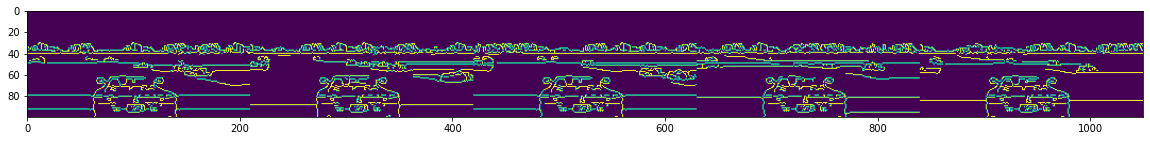

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 24625, dtype: uint8
[ 1.65  7.15  0.81 -1.06  1.39  1.37 25.34 69.67 -3.54]
Soma 1.0277843


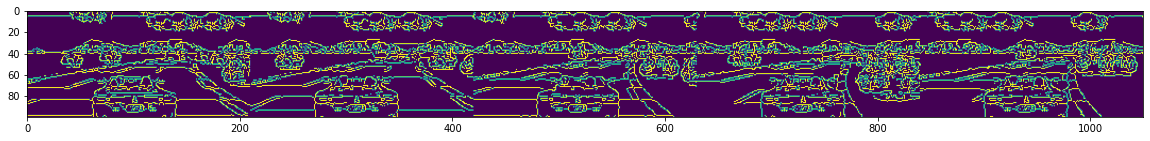

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 25441, dtype: uint8
[ 3.23 -3.06  1.99  1.16 -0.32  1.97 46.97  0.36 42.8 ]
Soma 0.9510175


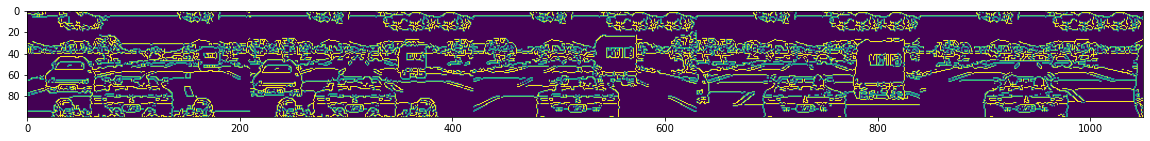

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 25624, dtype: uint8
[-0.19  0.23 -1.33  0.97  0.12 -1.05 89.46  0.41 10.04]
Soma 0.98669326


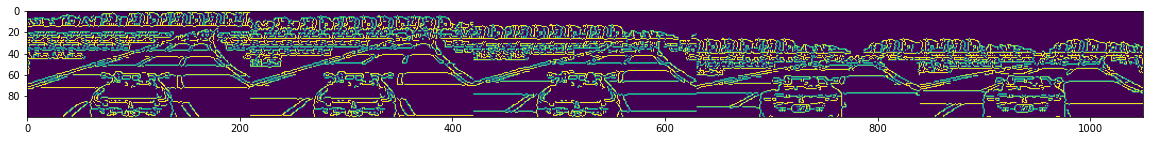

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    1
Name: 25781, dtype: uint8
[-0.54  0.26  6.72  1.69  2.28  6.02  3.22 -3.06 88.02]
Soma 1.046092


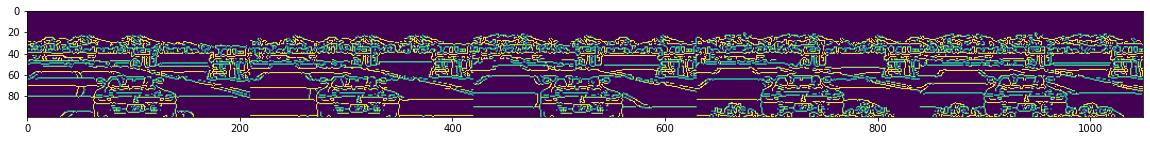

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 26213, dtype: uint8
[-1.15  8.85  0.22 -1.98  2.87  0.72 19.11 69.06  1.68]
Soma 0.99383736


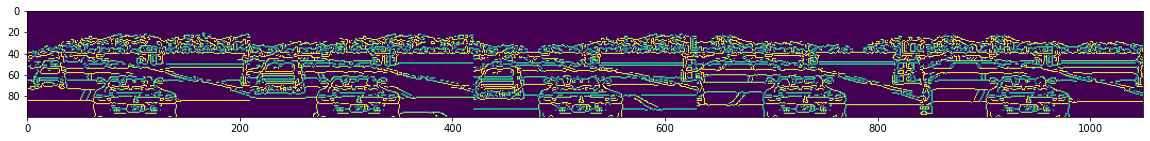

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    1
1010    0
Name: 26287, dtype: uint8
[-1.100e-01  7.930e+00 -1.000e-02 -2.230e+00  2.420e+00  1.090e+00
  1.777e+01  7.057e+01  1.600e-01]
Soma 0.9758507


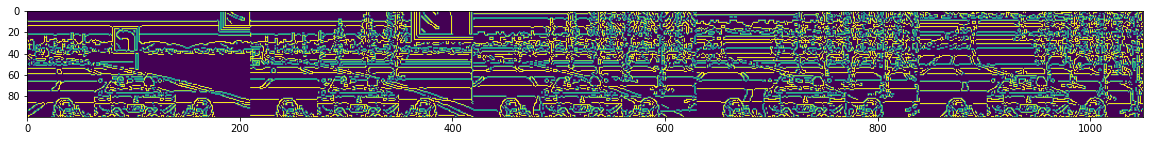

0       0
1       0
10      0
100     0
101     1
110     0
1000    0
1001    0
1010    0
Name: 28112, dtype: uint8
[ 2.39 11.42  0.55  1.68 10.73  1.06 31.53 37.17  8.95]
Soma 1.0548182


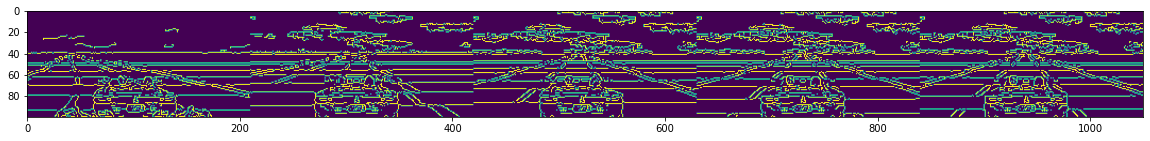

0       0
1       0
10      0
100     0
101     0
110     0
1000    1
1001    0
1010    0
Name: 28286, dtype: uint8
[-2.62  1.55  2.73 -1.3  -2.81  0.15 91.47  6.65  3.13]
Soma 0.98961097


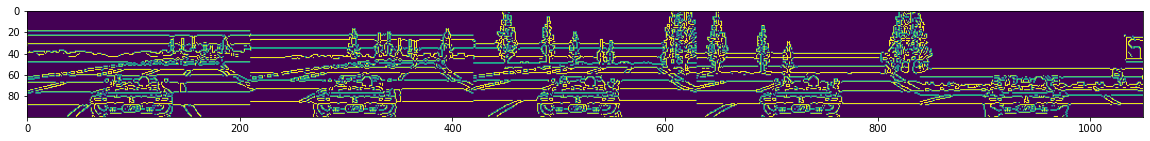

0       0
1       0
10      0
100     0
101     0
110     0
1000    0
1001    0
1010    1
Name: 29978, dtype: uint8
[ 1.2   1.92  2.01 -0.07  0.64  2.65 53.18  4.46 31.24]
Soma 0.9721948


In [36]:
for i in range(0,frame_imgs.shape[0]):
    if np.random.rand() < 0.001:
        plt.figure(figsize=(20,20))
        plt.imshow(np.hstack(np.array([frame_imgs[i,:,:,0],frame_imgs[i,:,:,1],frame_imgs[i,:,:,2],frame_imgs[i,:,:,3],frame_imgs[i,:,:,4]])))
        plt.show()
        print(com.iloc[i])
        print(np.round(model.predict(np.expand_dims(frame_imgs[i,:,:,:],axis=0))[0]*100,2))
        print('Soma',np.sum(model.predict(np.expand_dims(frame_imgs[i,:,:,:],axis=0))))